In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
import matplotlib.tri as mtri
from matplotlib.patches import FancyArrowPatch, ArrowStyle
from time import sleep


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#%matplotlib widget
#%matplotlib inline

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    style = ArrowStyle('Fancy', head_length=2, head_width=2, tail_width=1)
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, arrowstyle=style,**kwargs)
    ax.add_artist(arrow)
    return arrow


def polarization(amp_ratio=1, phix=0, phiy=0, tmax=4, elev=20, azim=-20, roll=0):
    
    tt = np.arange(0,  tmax*np.pi, 0.1)

    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(1,1,1, projection='3d')
    ax1.view_init(elev=elev, azim=azim, roll=roll)
    ax1.set_xlim(-5,4*np.pi)
    ax1.set_ylim(-1.1,1.1)
    ax1.set_zlim(-1.1,1.1)
    ax1.set_box_aspect(aspect=(8*np.pi,8,8))

    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.zaxis.set_ticklabels([])
    #ax1.set_axis_off()

    for n in range(10,len(tt),10):
# Make a mesh in the space of parameterisation variables u and v
        t = tt[0:n]
        
        # This is the Mobius mapping, taking a u, v pair and returning an x, y, z
        # triple
        amp=np.sqrt(1+amp_ratio**2)
        x = 1/amp*np.sin(-t+phix*np.pi)
        y = amp_ratio/amp*np.sin(-t+phiy*np.pi)
        z = t
     
        # Plot the projection on the XY plane
        p1=ax1.plot(np.zeros_like(z)-5,  y, x, color='r', linestyle='solid',linewidth=1)
        p2=ax1.plot(np.zeros(50)-5, np.cos(np.linspace(0,2*np.pi,50)) , np.sin(np.linspace(0,2*np.pi,50)), color='k', 
                 linestyle='dashed',linewidth=1)
    
    
        #ax2.plot(np.zeros_like(t),  y, x, color='r', linestyle='solid',linewidth=1)
    
        # Plot the 3D curve
        p3=ax1.plot(z, y, x, color='b',linewidth=1)
        #ax2.plot(t, y, np.zeros_like(x), label='3D curve', color='b',linewidth=1)
        #ax2.plot(t, np.zeros_like(y), x, label='3D curve', color='b',linewidth=1)
    
        
        #ax2.set_ylim(-1.1,1.1)
        #ax2.set_zlim(-1.1,1.1)
        
        #plt.show()
    
        p4=_arrow3D(ax1, t[-1],0,0,
               0,y[-1],x[-1],
               mutation_scale=6,
               ec ='blue',
               fc='red', alpha=1,lw=1)
    
        p5=_arrow3D(ax1, -5,0,0,
               0,y[-1],x[-1],
               mutation_scale=6,
               ec ='blue',
               fc='red', alpha=1,lw=1)

        #plt.show()

        #sleep(0.1)

        
        #plt.pause(0.1)
        #p1[0].remove()
        #p2[0].remove()
        #p3[0].remove()
        #p4.remove()
        #p5.remove()



amp_ratio = widgets.FloatSlider(min=0,max=5,step=0.05, description="E_y/E_x", value=1)
phix = widgets.FloatSlider(min=-0.5,max=0.5,step=0.1, description="phi_x", value=0)
phiy = widgets.FloatSlider(min=-0.5,max=0.5,step=0.1, description="phi_y", value=0)
tmax = widgets.FloatSlider(min=0.15,max=4,step=0.1, description="t_max", value=4)
elev = widgets.FloatSlider(min=-270,max=270,step=0.25, description="elev", value=20)
azim = widgets.FloatSlider(min=-270,max=270,step=0.25, description="azim", value=-35)
roll = widgets.FloatSlider(min=-270,max=270,step=0.25, description="roll", value=0)

# An HBox lays out its children horizontally
#ui = widgets.Box([ amp_ratio,  phix,  phiy, tmax, elev, azim, roll])


ui =widgets.GridBox(children=[ amp_ratio,  elev,  phix, azim, phiy,roll, tmax],
                    layout=widgets.Layout(
                            width='100%',
                            grid_template_columns='30% 30%',
                            grid_template_rows='30px 30px 30px 30px',
                            grid_gap='12px 2px')
       )

out = widgets.interactive_output(polarization, {'amp_ratio': amp_ratio, 'phix': phix, 'phiy': phiy,
                                 'tmax': tmax , 'elev':elev, 'azim':azim, 'roll':roll} )

display(ui, out)



GridBox(children=(FloatSlider(value=1.0, description='E_y/E_x', max=5.0, step=0.05), FloatSlider(value=20.0, d…

Output()

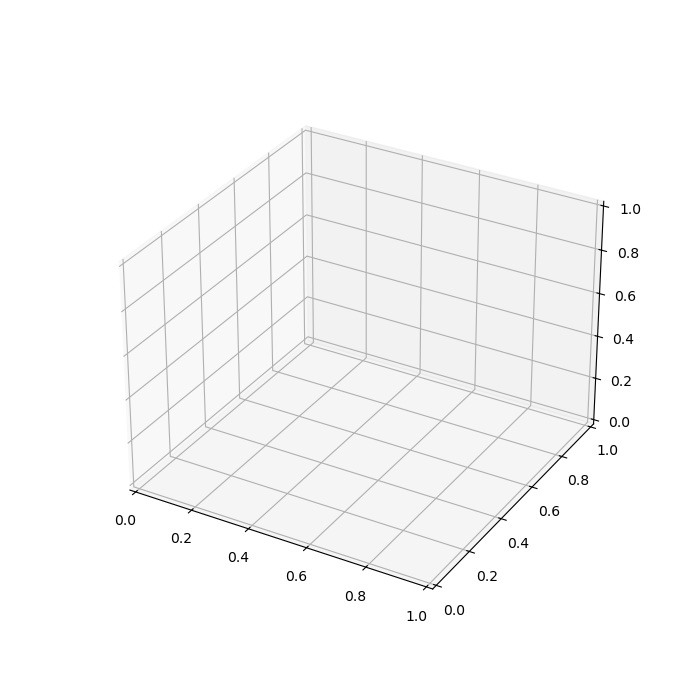

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
import matplotlib.tri as mtri
from matplotlib.patches import FancyArrowPatch, ArrowStyle
import matplotlib.animation as animation


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib widget


class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    style = ArrowStyle('Fancy', head_length=2, head_width=2, tail_width=1)
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, arrowstyle=style,**kwargs)
    ax.add_artist(arrow)
    return arrow


def polarization(amp_ratio=1, phix=0, phiy=0, tmax=4, elev=20, azim=-20, roll=0):

    t = np.arange(0,  tmax*np.pi, 0.1)
    
    def pol_plot(frame):
        print(frame)
        t = t[0:frame]
        rad = np.linspace(0, 1, endpoint=True, num=10)
        u, v = np.meshgrid(t, rad)
        u, v = u.flatten(), v.flatten()

        amp=np.sqrt(1+amp_ratio**2)
        x = 1/amp*np.sin(-t+phix*np.pi)
        y = amp_ratio/amp*np.sin(-t+phiy*np.pi)
        z = t

        X = 1/amp*v*np.sin(-u+phix*np.pi)
        Y = amp_ratio/amp*v*np.sin(-u+phiy*np.pi)
        Z = u

        # Create the Triangulation; no triangles so Delaunay triangulation created.
    
        tri = mtri.Triangulation(u, v)

        ax1.plot(np.zeros_like(z)-5,  y, x, color='r', linestyle='solid',linewidth=1)
        ax1.plot(np.zeros(50)-5, np.cos(np.linspace(0,2*np.pi,50)) , np.sin(np.linspace(0,2*np.pi,50)), color='k', 
             linestyle='dashed',linewidth=1)
        ax1.plot_trisurf(Z, Y, X, triangles=tri.triangles, color='grey', lightsource=ls)
        ax1.plot(z, y, x, color='b',linewidth=1)

        arrow3D(ax1, tmax*np.pi,0,0,
           0,y[-1],x[-1],
           mutation_scale=6,
           ec ='blue',
           fc='red', alpha=1,lw=1)

        arrow3D(ax1, -5,0,0,
           0,y[-1],x[-1],
           mutation_scale=6,
           ec ='blue',
           fc='red', alpha=1,lw=1)


    fig = plt.figure(figsize=(7,7))
    ax1 = fig.add_subplot(1,1,1, projection='3d')
    #ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax1.view_init(elev=elev, azim=azim, roll=roll)
    #ax1.set_axis_off()
    #ax2.view_init(elev=20, azim=-70, roll=0)

    # Plot the projection on the XY plane
    ax1.set_xlim(-5,4*np.pi)
    ax1.set_ylim(-1.1,1.1)
    ax1.set_zlim(-1.1,1.1)
    ax1.set_box_aspect(aspect=(8*np.pi,8,8))
    ls = LightSource(90,-0)

    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.zaxis.set_ticklabels([])

    ani = animation.FuncAnimation(fig=fig, func=pol_plot, frames=100, interval=1)

    return ani 

    

amp_ratio = widgets.FloatSlider(min=0,max=5,step=0.05, description="E_y/E_x", value=1)
phix = widgets.FloatSlider(min=-0.5,max=0.5,step=0.1, description="phi_x", value=0)
phiy = widgets.FloatSlider(min=-0.5,max=0.5,step=0.1, description="phi_y", value=0)
#tmax = widgets.FloatSlider(min=0.15,max=4,step=0.1, description="t_max", value=4)
elev = widgets.FloatSlider(min=-270,max=270,step=0.25, description="elev", value=20)
azim = widgets.FloatSlider(min=-270,max=270,step=0.25, description="azim", value=-35)
roll = widgets.FloatSlider(min=-270,max=270,step=0.25, description="roll", value=0)

# An HBox lays out its children horizontally
#ui = widgets.Box([ amp_ratio,  phix,  phiy, tmax, elev, azim, roll])


ui =widgets.GridBox(children=[ amp_ratio,  elev,  phix, azim, phiy,roll],
                    layout=widgets.Layout(
                            width='100%',
                            grid_template_columns='30% 30%',
                            grid_template_rows='30px 30px 30px 30px',
                            grid_gap='12px 2px')
       )


#out = widgets.interactive_output(polarization, {'amp_ratio': amp_ratio, 'phix': phix, 'phiy': phiy,
#                                 'elev':elev, 'azim':azim, 'roll':roll} )

#display(ui, out)

def pol_plot(frame):
    t = np.arange(0,  4*np.pi, 0.1)
    phix=0.5
    phiy=0
    amp_ratio=1
    
    t = t[0:frame]
    
    rad = np.linspace(0, 1, endpoint=True, num=10)
    u, v = np.meshgrid(t, rad)
    u, v = u.flatten(), v.flatten()

    amp=np.sqrt(1+amp_ratio**2)
    x = 1/amp*np.sin(-t+phix*np.pi)
    y = amp_ratio/amp*np.sin(-t+phiy*np.pi)
    z = t

    X = 1/amp*v*np.sin(-u+phix*np.pi)
    Y = amp_ratio/amp*v*np.sin(-u+phiy*np.pi)
    Z = u

    # Create the Triangulation; no triangles so Delaunay triangulation created.

    tri = mtri.Triangulation(u, v)

    ax1.clear()

    p1=ax1.plot(np.zeros_like(z)-5,  y, x, color='r', linestyle='solid',linewidth=1)
    #p2=ax1.plot(np.zeros(50)-5, np.cos(np.linspace(0,2*np.pi,50)) , np.sin(np.linspace(0,2*np.pi,50)), color='k', 
    #     linestyle='dashed',linewidth=1)
    #ls = LightSource(90,-0)
    #p3=ax1.plot_trisurf(Z, Y, X, triangles=tri.triangles, color='grey', lightsource=ls)
    #p4=ax1.plot(z, y, x, color='b',linewidth=1)

    #plt.show()
    
    return p1,

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ani = animation.FuncAnimation(fig=fig, func=pol_plot, frames=50, interval=10)

#pol_plot(50)





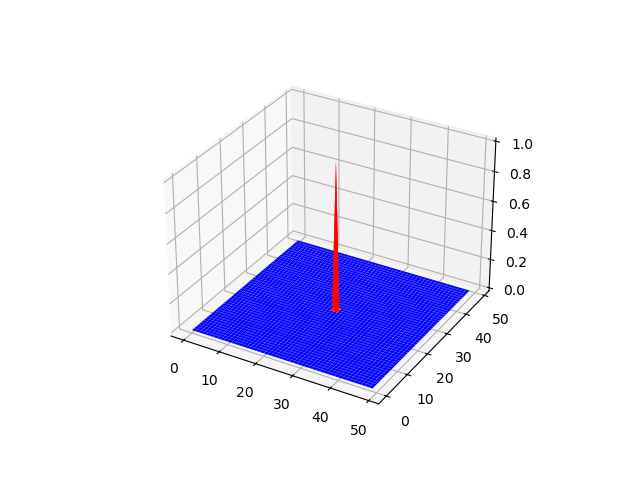

In [44]:
from __future__ import division
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import numpy as np

%matplotlib widget

def data_gen(framenumber, soln, plot):
    #change soln variable for the next frame
    ...
    ax.clear()
    plot = ax.plot_surface(X, Y, soln, **plot_args)
    return plot,
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d') 

plot_args = {'rstride': 1, 'cstride': 1, 'cmap':
             cm.bwr, 'linewidth': 0.01, 'antialiased': True, 'color': 'w',
             'shade': True}

size=50
soln = np.zeros((size, size))
midpoint = size // 2
soln[midpoint, midpoint] = 1

#first frame
X = range(size)
Y = range(size)
X, Y = np.meshgrid(X, Y)
plot = ax.plot_surface(X, Y, soln, **plot_args)
pam_ani = animation.FuncAnimation(fig, data_gen, fargs=(soln, plot), frames=50,
                              interval=30, blit=False)



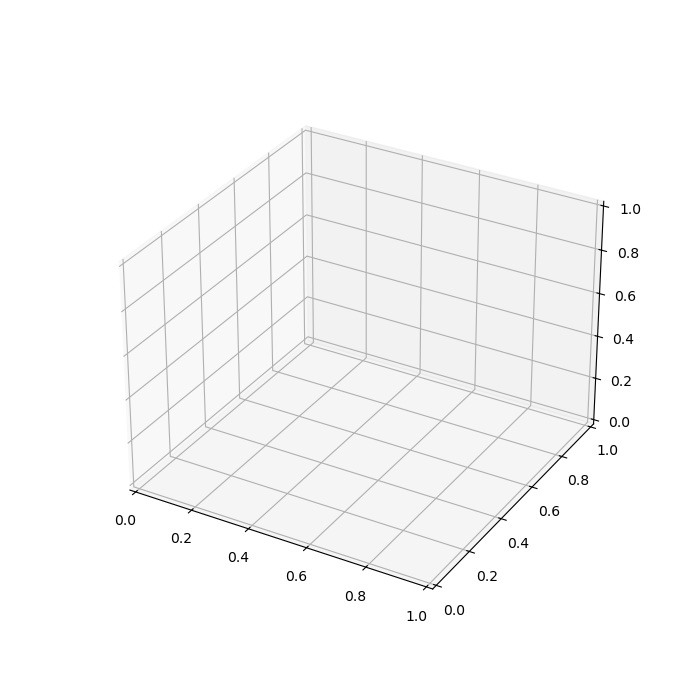

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
import matplotlib.tri as mtri
from matplotlib.patches import FancyArrowPatch, ArrowStyle
import matplotlib.animation as animation

%matplotlib widget

def pol_plot(frame):
    t = np.arange(0,  4*np.pi, 0.1)
    phix=0.5
    phiy=0
    amp_ratio=1
    
    t = t[0:frame+10]

    rad = np.linspace(0, 1, endpoint=True, num=10)
    u, v = np.meshgrid(t, rad)
    u, v = u.flatten(), v.flatten()


    amp=np.sqrt(1+amp_ratio**2)
    x = 1/amp*np.sin(-t+phix*np.pi)
    y = amp_ratio/amp*np.sin(-t+phiy*np.pi)
    z = t

    X = 1/amp*v*np.sin(-u+phix*np.pi)
    Y = amp_ratio/amp*v*np.sin(-u+phiy*np.pi)
    Z = u

    # Create the Triangulation; no triangles so Delaunay triangulation created.

    #tri = mtri.Triangulation(u, v)
    
    #ax1.clear()

    p1=ax1.plot(np.zeros_like(z)-5,  y, x, color='r', linestyle='solid',linewidth=1)
    p2=ax1.plot(np.zeros(50)-5, np.cos(np.linspace(0,2*np.pi,50)) , np.sin(np.linspace(0,2*np.pi,50)), color='k', 
         linestyle='dashed',linewidth=1)
    ls = LightSource(90,-0)
    #p3=ax1.plot_trisurf(Z, Y, X, triangles=tri.triangles, color='grey', lightsource=ls, edgecolor=None)
    p4=ax1.plot(z, y, x, color='b',linewidth=1)

    return p1,p2, p4
    #return p1,p2, p3, p4

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1, projection='3d')
ani = animation.FuncAnimation(fig=fig, func=pol_plot, frames=10, interval=1)